In [1]:
import mcstasscript as ms
import make_powder_instrument
from mcstasutils import plot
import quizlib

In [2]:
quiz = quizlib.Powder_Quiz()

# Powder diffraction exercise

In this notebook you will work with a McStas model of a simplified powder diffraction instrument.
You will have to answer questions in the notebook by working with this model, both by running simulations and expanding the model.
We will use the Python McStas API McStasScript to work with the instrument, you can find documentation [here](https://mads-bertelsen.github.io).

## Get the instrument object
First we need the McStas instrument object. Here it is retrieved from a local python function that generates it.

In [3]:
instrument = make_powder_instrument.make()

## Investigate instrument
The first task is to investigate the instrument object `instrument` using some of the available methods available on that object. Each method that show something about the instrument starts with the word show, so you can use tab to autocomplete in the cell to see the relevant methods.

In particular, look at what parameters are available and take a look at the instrument geometry.

In [4]:
instrument = make_powder_instrument.make()
instrument.show_parameters()

       l_min            = 0.5          // Minimum simulated wavelength [AA]
       l_max            = 4.0          // Maximum simulated wavelength [AA]
int    n_pulses         = 1            // Number of simulated pulses
       guide_curve_deg  = 1.0          // 
       detector_height  = 2.5          // 
       sample_radius    = 0.005        // 
       sample_height    = 0.02         // 
string sample_choice    = "no_sample"  // 


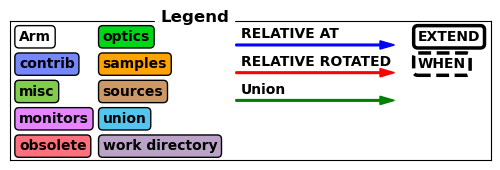

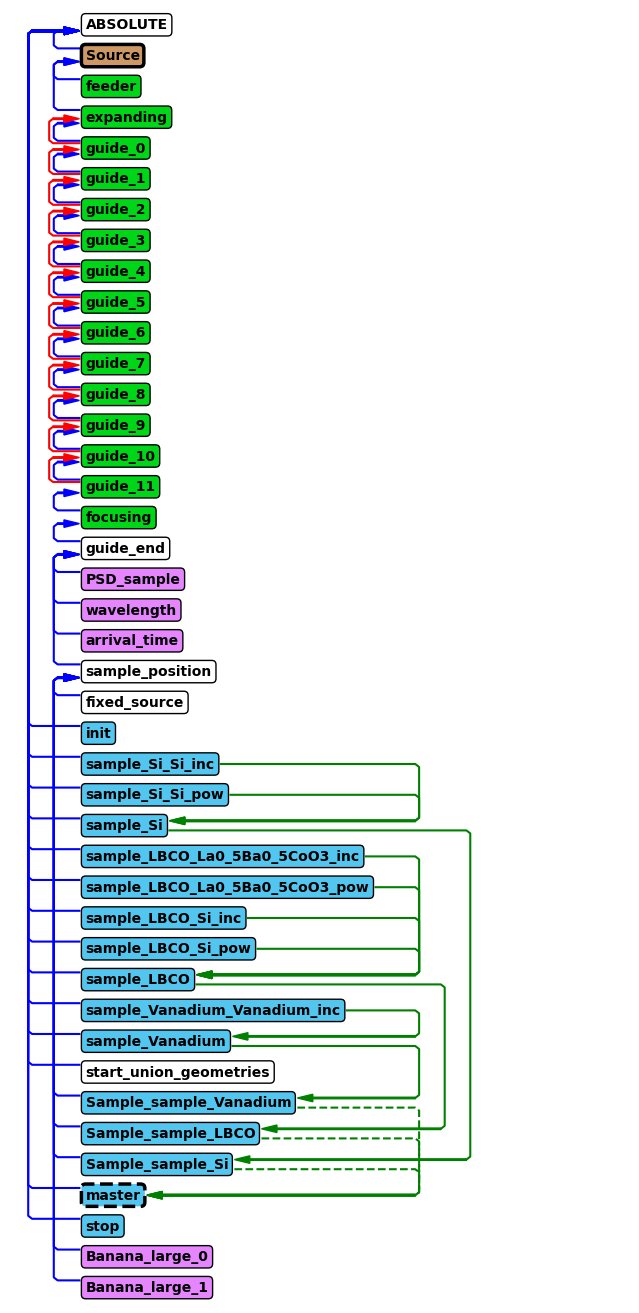

In [5]:
# instrument.show_instrument(format='window')
instrument.show_diagram()

### Set sample size
Select appropriate sample size given Vanadium has a macroscopic scattering cross section $\Sigma$ of around 0.35 cm^-1. A neutron beam with intensity $I_0$ that travel in a media a distance of $z$ will be attenuated as the neutrons scatter in the material, and the remaining intensity $I$ can be calculated with the Beer-Lambert law:
$$
I = I_0 e^{-z\Sigma}
$$

For our experiment we want to observe neutrons that scattered once, as neutrons that scatter more than once would be considered background.

What sample depth would be appropriate?

- A: 10 cm
- B: 1 cm
- C: 1 mm

In [6]:
# answer
import numpy as np
fraction_left = np.exp(-0.35*1)
print("scattering probability", 1 - fraction_left)
print("single scattering probability", (1 - fraction_left)*fraction_left)
print("double scattering probability", (1 - fraction_left)**2*fraction_left)
print("single to multiple scattering probability ", (1 - fraction_left)*fraction_left/(1-fraction_left))

scattering probability 0.29531191028128656
single scattering probability 0.2081027859273039
double scattering probability 0.06145523124704976
single to multiple scattering probability  0.7046880897187134


In [7]:
quiz.question_1("B")

Correct!
Yes, this is a reasonable mix, here there is a 30% probabilityfor a neutron to
scatter, so about 20% scatters exactly once.


### Set sample size in simulated instrument
Use the *set_parameters* method to set the sample thickness, here using the parameter *sample_radius*. Set the wavelength range using "l_min" and "l_max" to 2.5 - 2.501.

In [8]:
wavelength = 2.5
instrument.set_parameters(sample_radius=0.005, l_min=wavelength, l_max=wavelength + 0.001)

In [9]:
quiz.question_2(instrument)

Correct!
The parameters of the instrument were correctly set!


### Run simulation
Run the simulation in this configuration and plot the data.

In [10]:
instrument.settings(ncount=4.0e6, mpi=10, suppress_output=True, NeXus=True)
data = instrument.backengine()

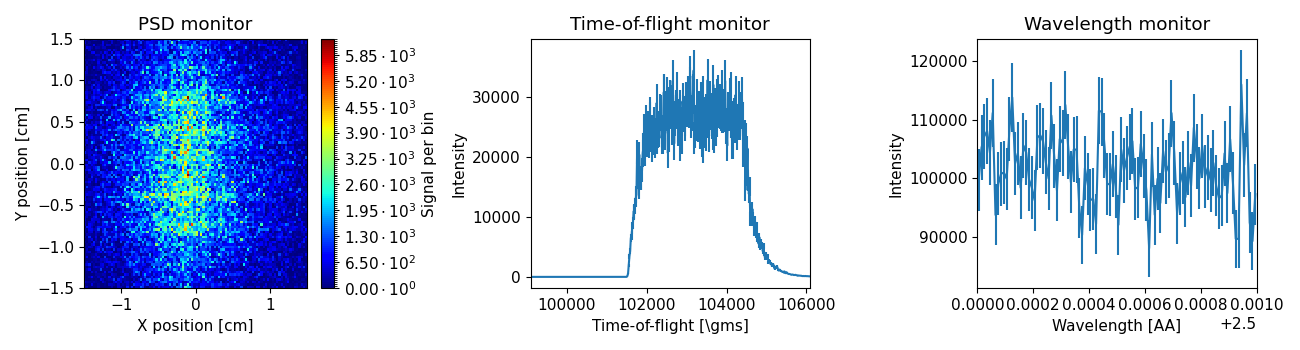

In [11]:
%matplotlib widget
ms.make_sub_plot(data)

### Time resolution
Whats the relative uncertainty on the time observed at the sample position, FWHM?

Insert value as a percentage.

In [12]:
# answer
print("delta t/t", (1.0453E5 - 1.0173E5)/(0.5*(1.0453E5 + 1.0173E5))*100, "%")

delta t/t 2.7150198778241057 %


In [13]:
quiz.question_3(2.715)

Correct!
Yes!


This will correspond to the wavelength resolution at this wavelength, generally we need less than 1% for powder diffraction, is this sufficient?

- A: yes
- B: no

In [14]:
quiz.question_4("B")

Correct!
Yes, this would result in insufficient wavelength resolution for powder
diffraction.


How could we improve this?
- A: monochromator
- B: chopper
- C: velocity selector
- D: shorter guide

In [15]:
quiz.question_5("B")

Correct!
Yes, that would ensure we knew that all neutrons passed through that point in
the guide at the same time, improving the time uncertainty.


The chopper needs to be inserted outside of the ESS monolith which has a radius of 6 m. Where in the McStas component sequence would that have to go?

- A: before feeder
- B: after feeder
- C: before expanding
- D: after expanding

In [16]:
quiz.question_6("B")

Correct!
Yes, the feeder ends just outside the monolith, so this is a great spot


Add the chopper with the following parameters:
- `yheight`: 0.05 m
- `radius`: 0.35 m
- `nslit`: 1.0
- `theta_0`: 7.0 deg
- `delay`: To the variable calculated in the instrument (use quotation marks)
- `nu`: A calculation using the `frequency_multiplier` variable, "frequency_multiplier*14.0"


In [17]:
# simple answer, to be used to skip this question (also sets position, next question)
#make_powder_instrument.add_chopper(instrument)

In [18]:
# Answer: Adding the chopper manually
make_powder_instrument.add_chopper_calculations(instrument)
    
chopper = instrument.add_component("chopper", "DiskChopper", after="feeder")
chopper.theta_0 = 7.0
chopper.nslit = 1
chopper.radius = 0.35
chopper.yheight = 0.05
chopper.nu = "frequency_multiplier*14.0"
chopper.delay = "delay"  # Variable with calculated delay

In [19]:
quiz.question_7(instrument)

Correct!
The DiskChopper was added at the right point in the component sequence and with
correct parameters!


Set the chopper position, a variable is already created with the name "chopper_position" and value of 6.5 meters, this is the distance relative to the neutron Source.

In [20]:
chopper = instrument.get_component("chopper")
chopper.set_AT("chopper_position", RELATIVE="Source")

In [21]:
quiz.question_8(instrument)

Correct!
The DiskChopper was added at the right point in the space!


Run the simulation with the parameter frequency_multiplier set to 3 and plot the data

In [22]:
# Answer
instrument.set_parameters(frequency_multiplier=3)
data = instrument.backengine()

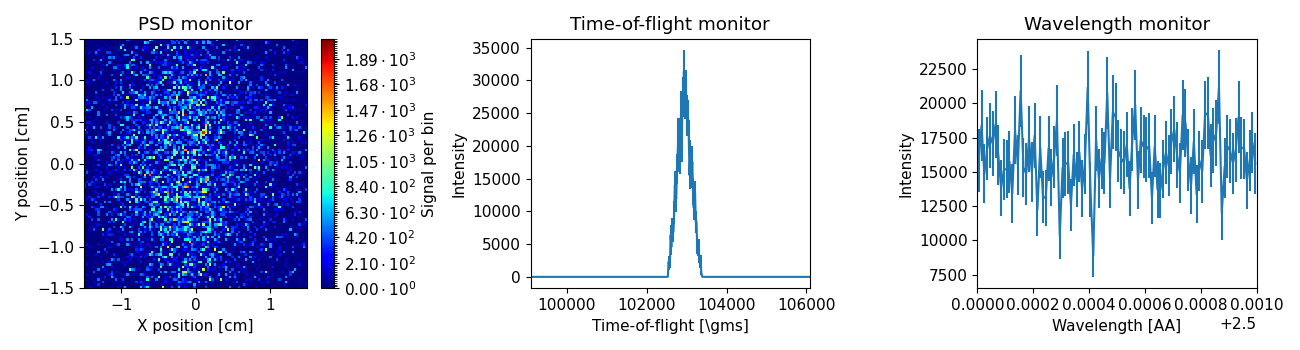

In [23]:
# Answer
ms.make_sub_plot(data)

Whats the relative time uncertainty with this setup? Insert the answer as a percentage.

In [24]:
print("delta t/t", (1.0315E5 - 1.0267E5)/1.0289E5*100, "%")

delta t/t 0.46651764019826997 %


In [25]:
quiz.question_9(0.4665)

Correct!
Yes!


### Set parameters for run with Si sample
Set wavelength interval from 0.5 to 4.0 Å
Select sample called "sample_Si", you will need to use '"string"'. The detector_height also needs to be set to 1.5 m.

In [28]:
instrument.set_parameters(sample_choice='"sample_Si"', l_min=0.5, l_max=4.0, detector_height=1.5)

In [29]:
quiz.question_10(instrument)

Correct!
The parameters of the instrument were correctly set!


Now we are ready to run the simulation

In [30]:
data = instrument.backengine()

The event data can be visualized with the supplied *plot* function.

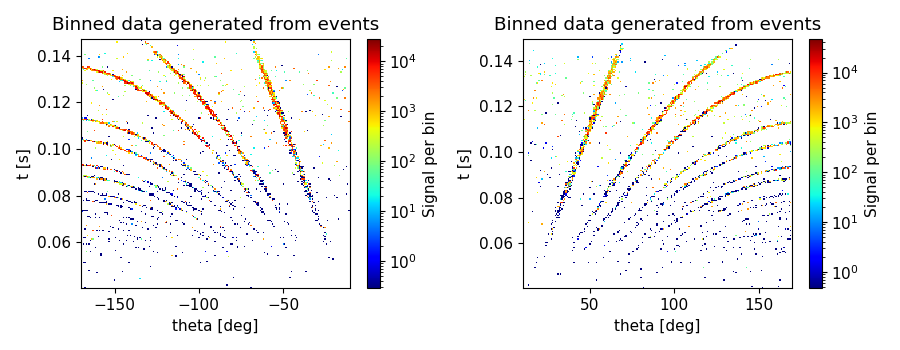

In [31]:
plot(data)

### Describe the data
What do we see in the plots from event data?

- A: Inelastic peaks
- B: Magnetic scattering
- C: Bragg peaks

In [32]:
quiz.question_11("C")

Correct!
Yes, the visible curves follow Braggs law, the incoming wavelength is correlated
with the time and thus the different bragg peaks follow their own curve in
wavelength and theta.


Set the instrument settings to a reasonable value for the number of neutrons and MPI processes. This will be used in the following simulations.

In [33]:
instrument.settings(ncount=4.0e8, mpi=2, suppress_output=True, NeXus=True)
instrument.settings(ncount=4.0e8, mpi=10, suppress_output=True, NeXus=True)

## Run reference sample: Si

In [34]:
# Set frequency multiplier to 3 for high resolution
instrument.set_parameters(sample_choice='"sample_Si"', frequency_multiplier=3, detector_height=1.5)
instrument.settings(output_path="output_sample_Si")

In [35]:
data_si = instrument.backengine()

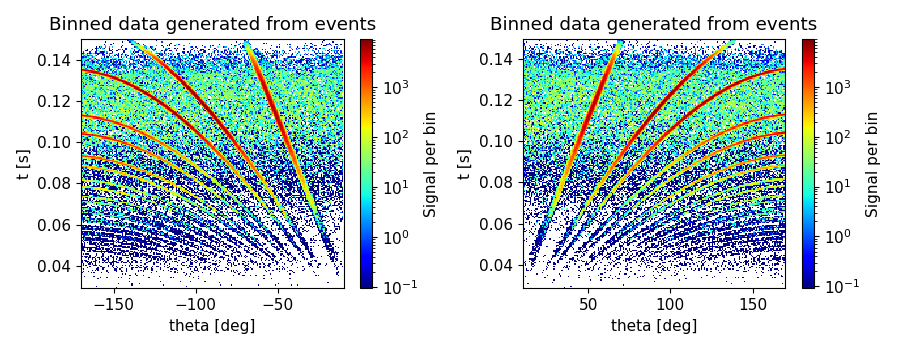

In [36]:
plot(data_si, orders_of_mag=5)

## Run calibration sample: Vanadium

In [37]:
instrument.set_parameters(sample_choice='"sample_Vanadium"')
instrument.settings(output_path="output_sample_vanadium")

data_vanadium = instrument.backengine()

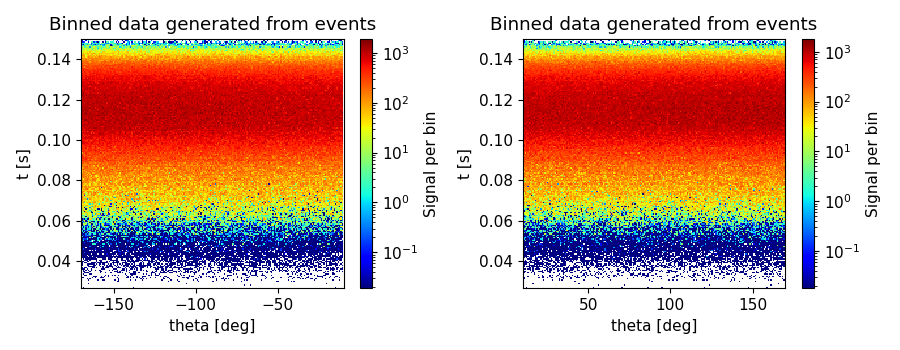

In [38]:
plot(data_vanadium, orders_of_mag=5)

## Run main sample: LBCO

In [39]:
instrument.set_parameters(sample_choice='"sample_LBCO"')
instrument.settings(output_path="output_sample_LBCO")

data_sample_lbco = instrument.backengine()

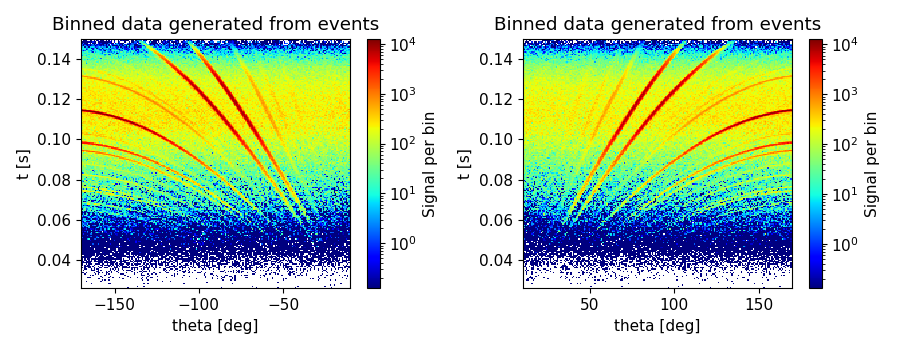

In [40]:
plot(data_sample_lbco, orders_of_mag=5)